In [1]:
import matplotlib . pyplot as pl
from KMeans import *

## Lire l'image

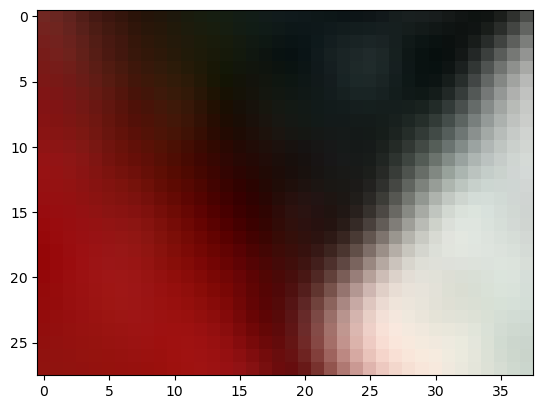

In [2]:
im = plt.imread("logo_cropped2.png ")[: ,: ,:3] #on garde que les
#3 premieres composantes , la transparence est inutile
im_h, im_l , _ = im.shape

pixels = im.reshape((im_h*im_l ,3)) #transformation en matrice n*3, n nombre de pixels
imnew = pixels.reshape((im_h,im_l ,3)) #transformation inverse

plt.imshow(im) 


## Compression

In [9]:
def compresser(pixels, km):
    pixels2 = []
    
    for point in pixels:
        pixels2.append(km.get_nouvelle_couleur_du_point(point))
    pixels2 = np.array(pixels2)
    imnew = pixels2.reshape((im_h,im_l ,3)) #transformation inverse
    plt.imshow(imnew)
    return pixels2

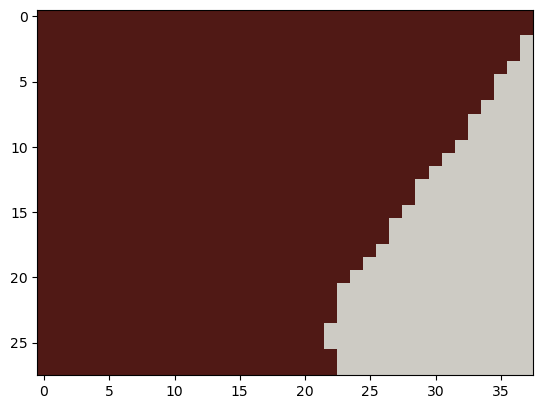

In [10]:
km2 = KMeans(2, pixels)
km2.fit()

pixels2 = compresser(pixels, km2)

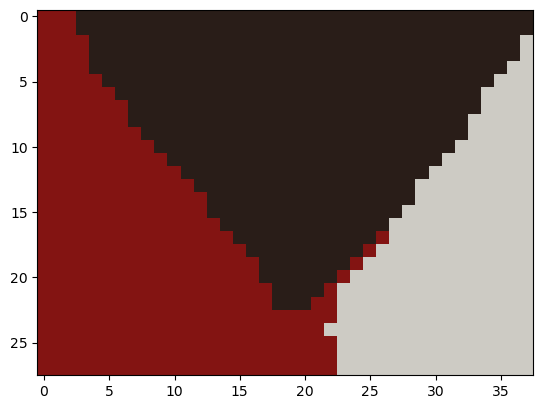

In [11]:
km3 = KMeans(3, pixels)
km3.fit()
pixels3 = compresser(pixels, km3)

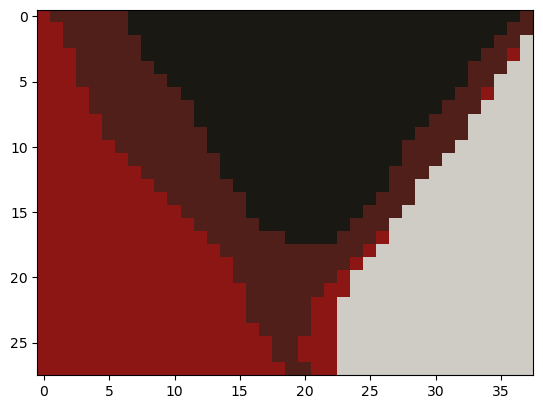

In [12]:
km3 = KMeans(4, pixels)
km3.fit()
pixels4 = compresser(pixels, km3)

## Afficher l'erreur

In [15]:
def distance_intra_cluster(pixels, pixels2):
    return np.sum((pixels-pixels2)**2)/pixels.shape[0]

couts = []

In [16]:
couts.append(distance_intra_cluster(pixels, pixels2))
couts.append(distance_intra_cluster(pixels, pixels3))
couts.append(distance_intra_cluster(pixels, pixels4))

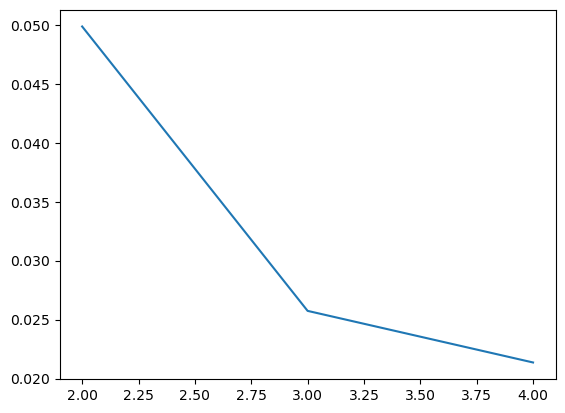

In [17]:
plt.plot([2, 3, 4], couts)